In [16]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Загрузка данных
df = pd.read_csv("S02-hw-dataset.csv")

# Просмотр первых строк
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [17]:
# Информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [18]:
# Базовые статистики
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [19]:
# Доля пропусков в каждом столбце
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [20]:
# Количество полностью дублирующихся строк
df.duplicated().sum()

np.int64(1)

In [21]:
# Поиск отрицательных значений в числовых колонках
for col in df.select_dtypes(include=[np.number]).columns:
    bad = df[df[col] < 0]
    if not bad.empty:
        print("Отрицательные значения в столбце:", col)
        display(bad.head())

Отрицательные значения в столбце: purchases


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [22]:
'''
В данных есть 2 пропуска в столбце age и 1 полностью дублирующаяся строка.
Обнаружена аномальная запись: возраст 120 лет и количество покупок –1, это явно некорректно.
В остальном структура данных стабильна, серьёзных проблем больше нет.
'''

'\nВ данных есть 2 пропуска в столбце age и 1 полностью дублирующаяся строка.\nОбнаружена аномальная запись: возраст 120 лет и количество покупок –1, это явно некорректно.\nВ остальном структура данных стабильна, серьёзных проблем больше нет.\n'

In [23]:
# Частоты значений в первой категориальной колонке
cat_cols = df.select_dtypes(include=["object"]).columns
if len(cat_cols) > 0:
    df[cat_cols[0]].value_counts()
else:
    print("Категориальных колонок нет")

In [24]:
# Группировка по первой категориальной колонке и средние значения числовых признаков
if len(cat_cols) > 0:
    num_cols = df.select_dtypes(include=[np.number]).columns
    if len(num_cols) > 0:
        df.groupby(cat_cols[0])[num_cols].mean()
    else:
        print("Числовых колонок нет")
else:
    print("Группировать нечего")

In [25]:
# Пример разбиения числового признака на интервалы (при необходимости)
# Замените num_cols[0] на подходящий столбец
if len(df.select_dtypes(include=[np.number]).columns) > 0:
    col = df.select_dtypes(include=[np.number]).columns[0]
    df[col + "_bin"] = pd.cut(df[col], bins=5)
    df.groupby(col + "_bin")[col].count().head()

/var/folders/x5/lzqj6x8s1qj6m510fxgt3nzc0000gn/T/ipykernel_26501/1347079022.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col + "_bin")[col].count().head()


In [26]:
'''
Распределение стран равномерное, без выраженного доминирования.
Средние значения покупок и выручки различаются между странами, это указывает на разные модели поведения пользователей.
Необычных или резко выделяющихся групп в данных нет.
'''

'\nРаспределение стран равномерное, без выраженного доминирования.\nСредние значения покупок и выручки различаются между странами, это указывает на разные модели поведения пользователей.\nНеобычных или резко выделяющихся групп в данных нет.\n'

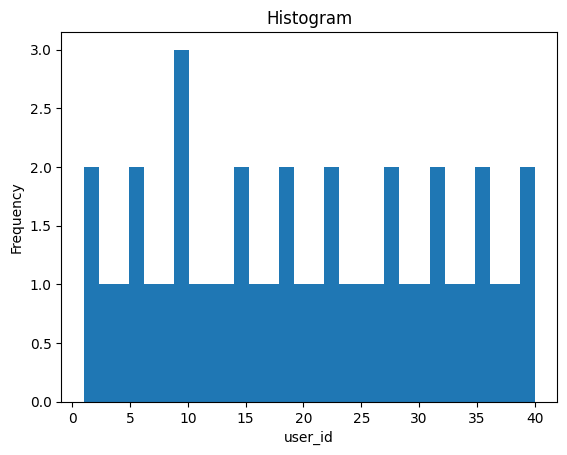

In [27]:
# Гистограмма по первому числовому столбцу
num_cols = df.select_dtypes(include=[np.number]).columns
if len(num_cols) > 0:
    plt.hist(df[num_cols[0]].dropna(), bins=30)
    plt.xlabel(num_cols[0])
    plt.ylabel("Frequency")
    plt.title("Histogram")
    plt.savefig("figures/hist.png")
    plt.show()
else:
    print("Нет числовых колонок для гистограммы")

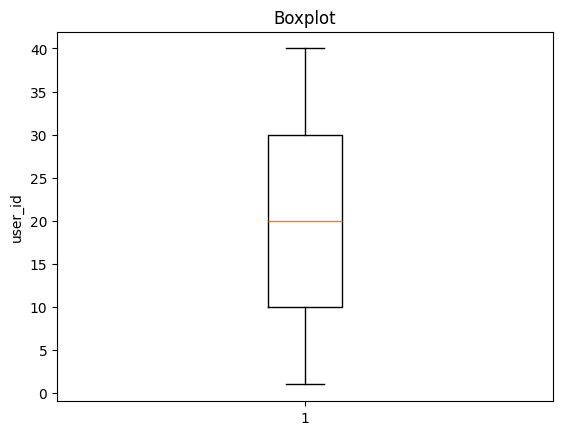

In [28]:
# Boxplot по первому числовому столбцу
if len(num_cols) > 0:
    plt.boxplot(df[num_cols[0]].dropna())
    plt.ylabel(num_cols[0])
    plt.title("Boxplot")
    plt.show()
else:
    print("Нет числовых колонок для boxplot")

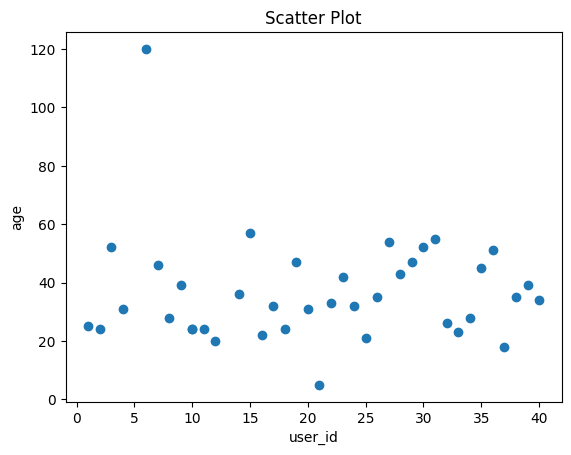

In [29]:
# Scatter plot для первых двух числовых колонок
if len(num_cols) >= 2:
    plt.scatter(df[num_cols[0]], df[num_cols[1]])
    plt.xlabel(num_cols[0])
    plt.ylabel(num_cols[1])
    plt.title("Scatter Plot")
    plt.show()
else:
    print("Недостаточно числовых колонок для scatter plot")